In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = (12, 5)

data = xr.open_dataset("test_data/garbe_2020_antarctica.nc")
data = data.coarsen(x=2, y=2, time=2, boundary="trim").reduce(np.mean)

In [2]:
# with this, you don't need to restart the notebook after making changes in the toad package.
%load_ext autoreload
%autoreload 2
from toad import TOAD

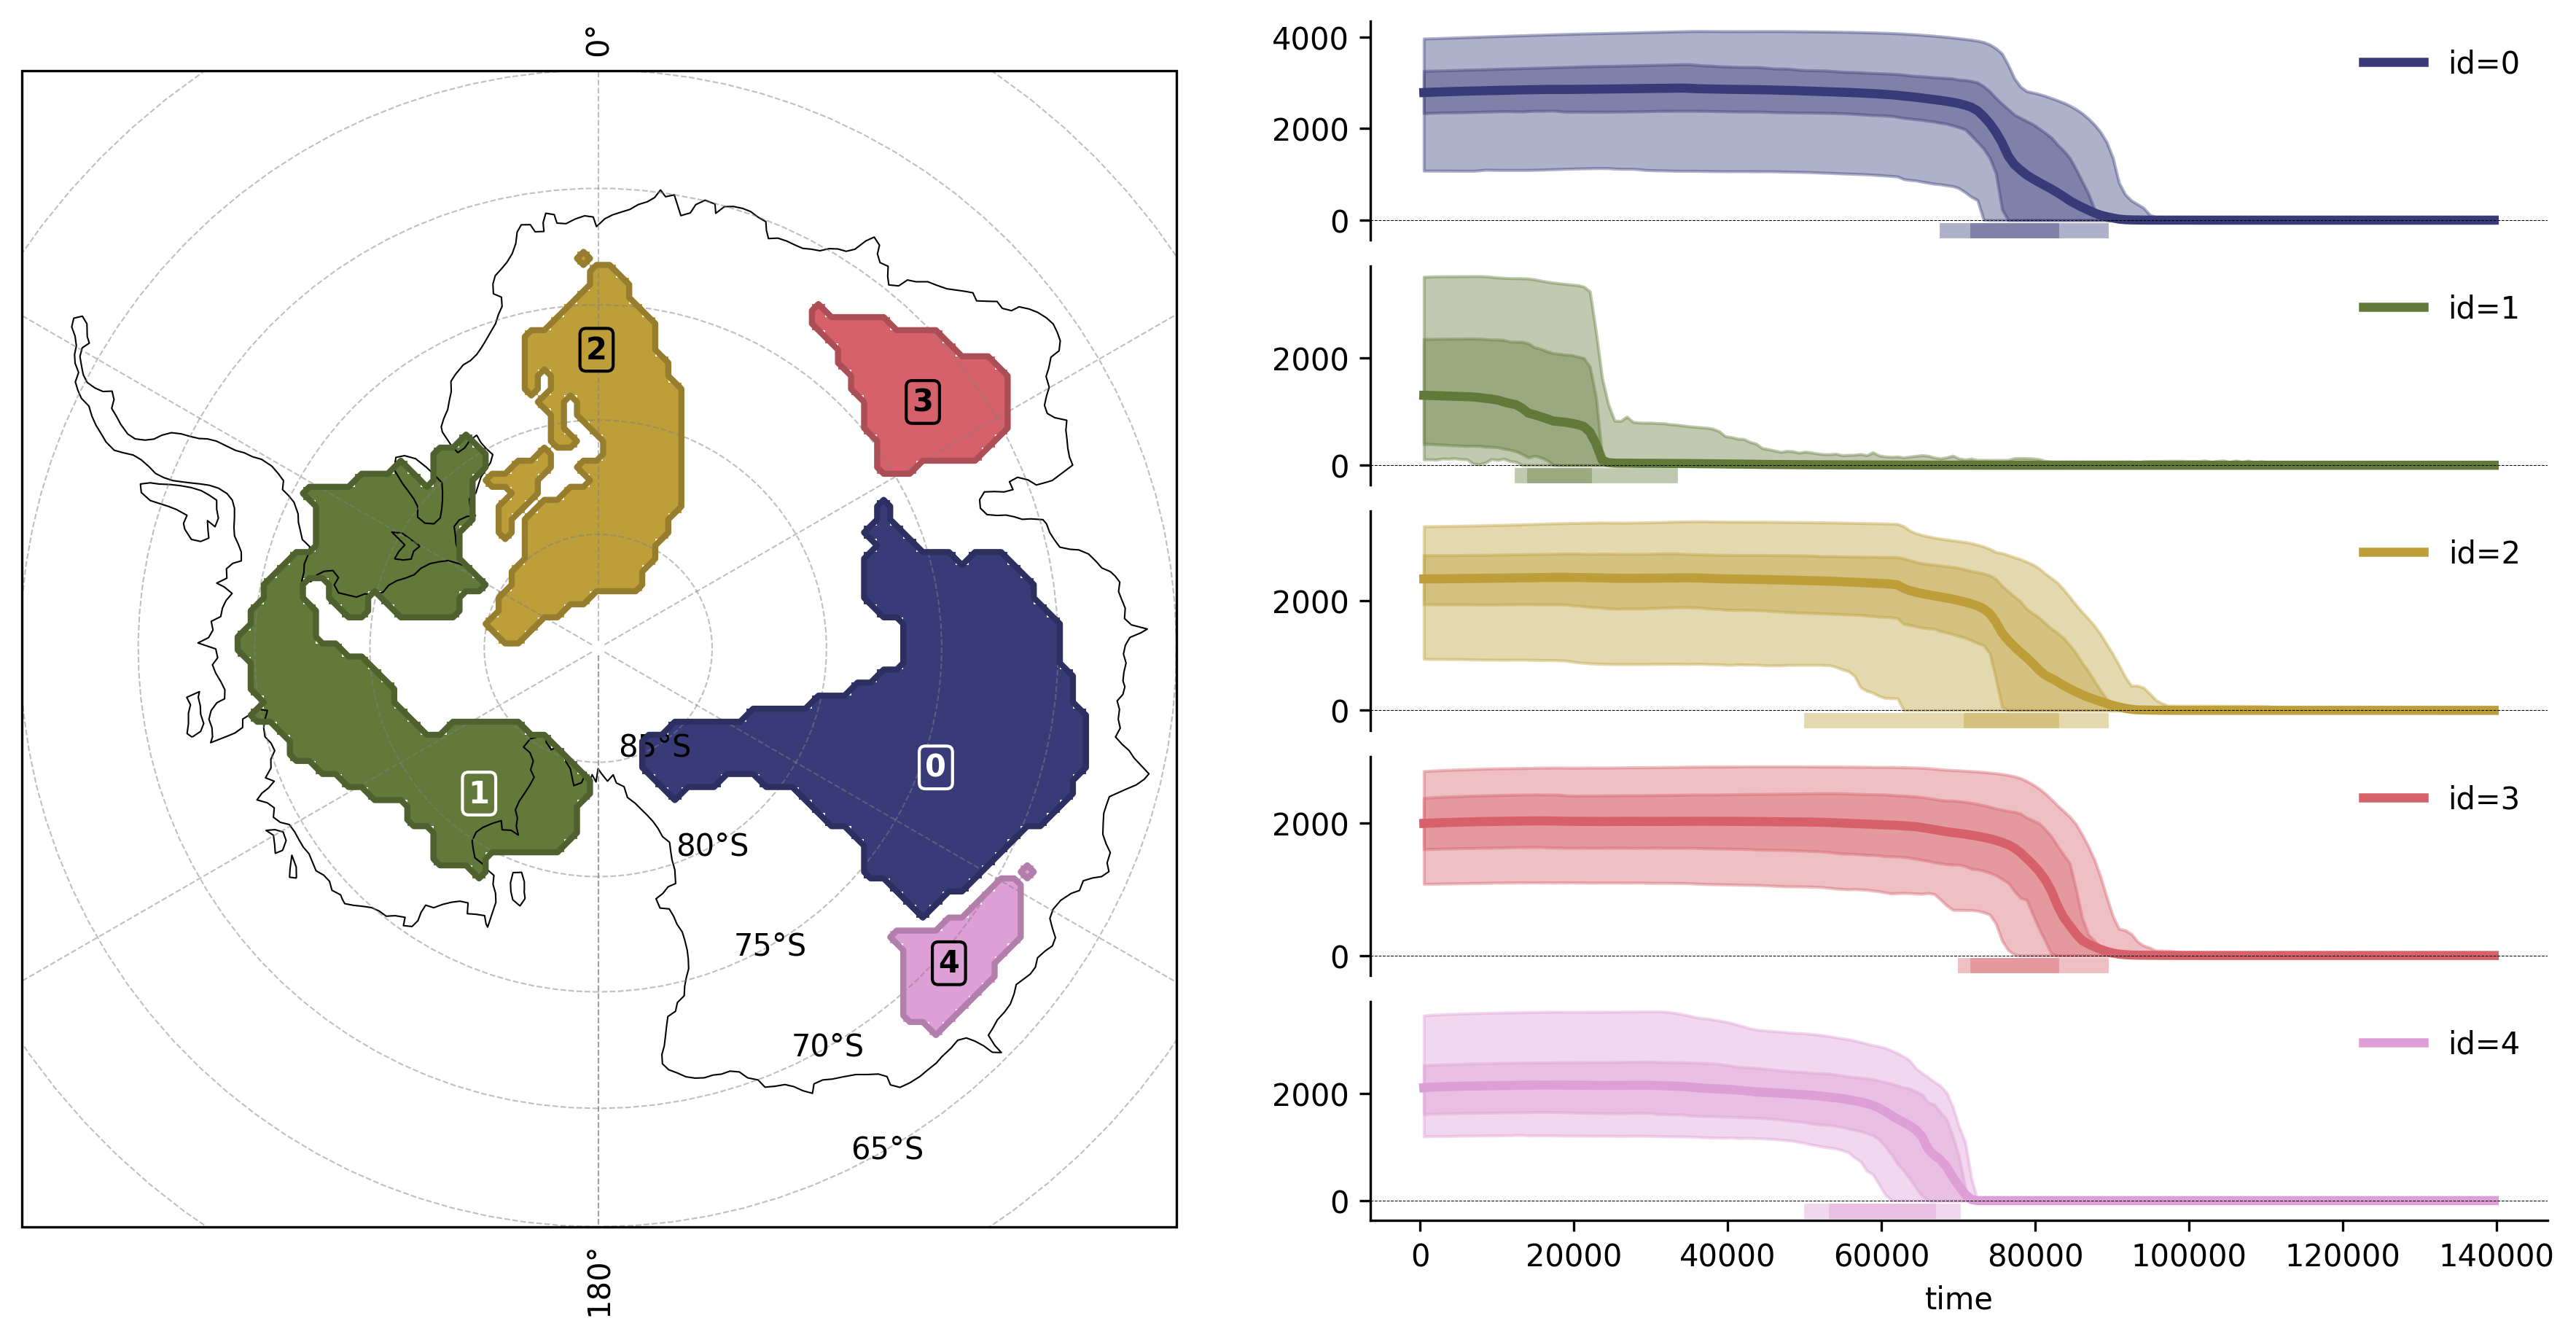

In [3]:
# from toad.shifts_detection.methods import ASDETECT
from sklearn.cluster import HDBSCAN  # type: ignore

td = TOAD(data)
# td.compute_shifts("thk", method=ASDETECT()) # already computed

td.compute_clusters(
    var="thk",
    method=HDBSCAN(min_cluster_size=10),
    shifts_filter_func=lambda x: np.abs(x) > 0.9,
)

td.plotter().cluster_overview("thk", cluster_ids=range(5), projection="south_pole");

Compute cluster_abruptness for first 5 clusters. This score gives a number between 0 and 1, where 0 means that the mean of the timeseries is a perfect linear slope, while 1 means that the mean of the timeseries is a perfect heavyside function.


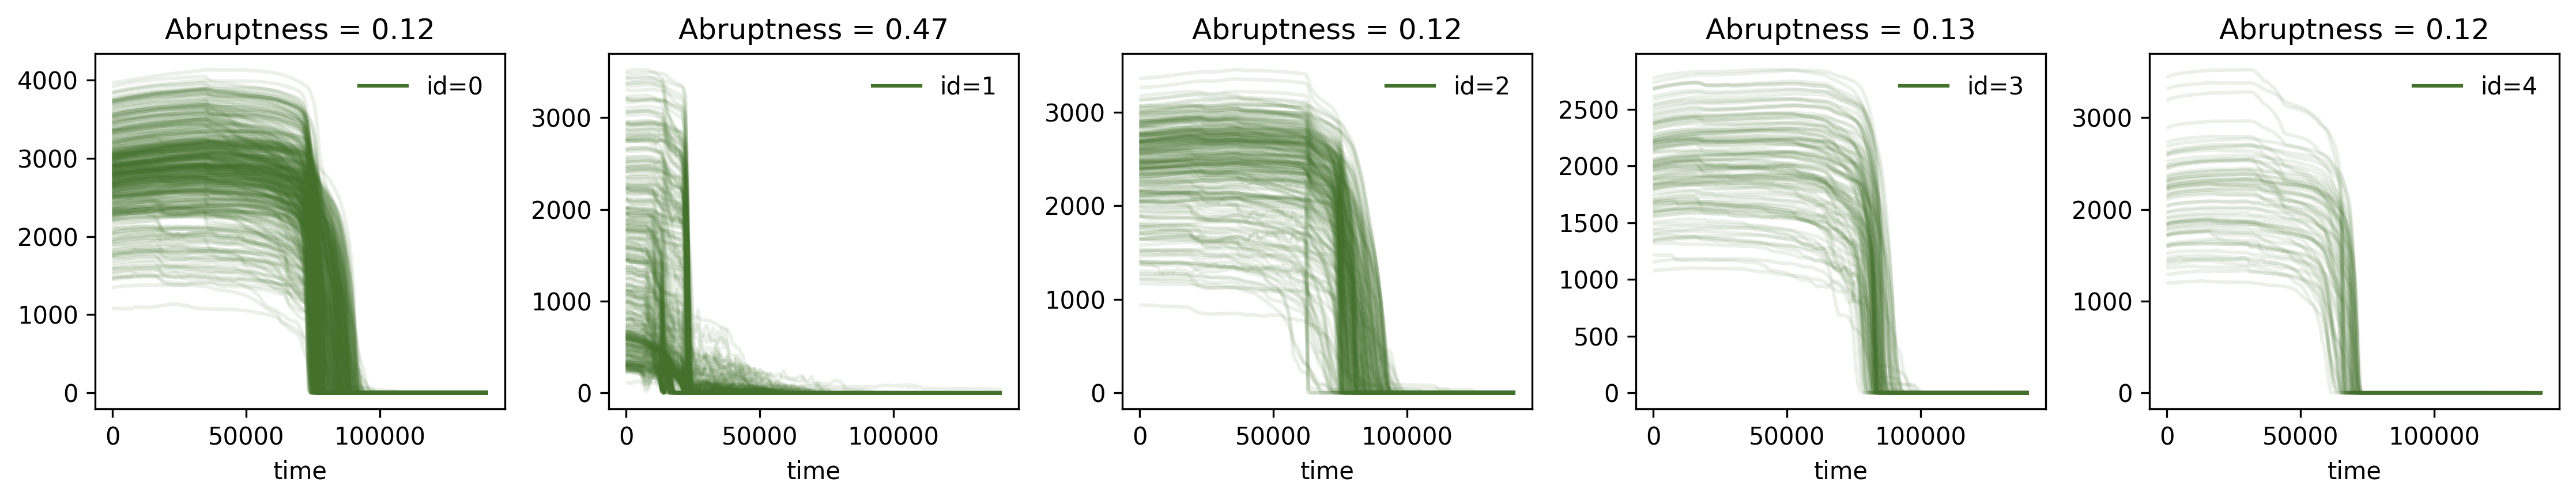

In [7]:
fig, axs = plt.subplots(1, 5, figsize=(15, 3))

for i in range(5):
    td.plotter().cluster_timeseries("thk", cluster_ids=[i], ax=axs[i])
    axs[i].set_ylabel("")

    # plot cluster_abruptness as title
    score = td.cluster_stats("thk").general.score_heaviside(
        cluster_id=i
    )  # TODO: replace with your scores
    axs[i].set_title(f"Abruptness = {score:.2f}")

plt.tight_layout()